# Mini-lab 02: Linear Regression


As mentioned in the lecture, least square linear regression can be done analytically. The main pedagogical point of this mini-lab is to illustrate finding model parameters. Regression models are primarily used as illustration. 

There are several regression models where the parameters cannot be found analytically. Most of these models fall outside the scope of this course.

As usual, we start with imports.

In [1]:
import numpy as np
import time

import matplotlib.pyplot as plt
import ipywidgets
from IPython import display

%matplotlib inline

## Data

Do you remember Anscombe's Quartet?

In [2]:
def anscombe(n=1):
  """Load one set of Anscombe's Quartet"""
  assert 1 <= n and n <= 4
  X = np.vstack([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
  if n == 1:
    y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
  elif n == 2:
    y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
  elif n == 3:
    y = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
  elif n == 4:
    X = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
    y = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
  X = np.vstack(X)
  y = np.asarray(y)
  return X, y

X, y = anscombe(1)

## The first model

For simplicity, we can define a model with intercept and slope as explicit arguments.

In [3]:
def simple_model(x, intercept, slope):
  ret = intercept + x*slope
  return ret.ravel()

Now for plotting the loaded data and the model    given predefined parameter values. Each set in Anscombe's Quartet looks different but has the same parameters.

In [4]:
intercept = 3
slope = .5

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


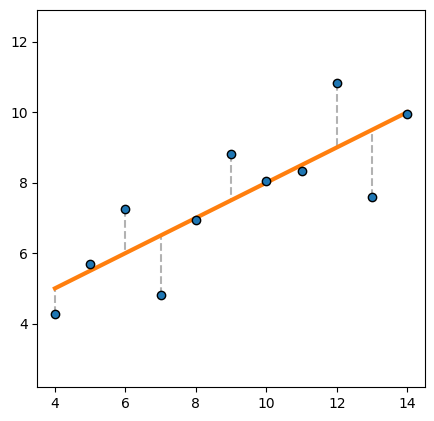

In [5]:
plt.figure(figsize=(5, 5), dpi=100)

x_plot = np.asarray([X.min(), X.max()])
plt.plot(x_plot, simple_model(x_plot, intercept, slope), color='C1', linewidth=3, zorder=0)

for i in range(X.shape[0]):
  plt.plot([X[i], X[i]], [y[i], simple_model(X[i], intercept, slope)], 'k--', alpha=.3, zorder=-1)

plt.scatter(X, y, color='C0', edgecolors='k', zorder=1)

plt.axis('equal')
plt.show()

By changing the parameters, we get different models.

In [6]:
def interactive_residual_plot(intercept, slope):
  # Create the plot
  plt.figure(figsize=(5, 5), dpi=100)
  # Plot regression line
  x_plot = np.asarray([X.min(), X.max()])
  plt.plot(x_plot, intercept + slope*x_plot, color='C1', linewidth=3, zorder=0, label="Trendline")
  # Plot training data
  plt.scatter(X, y, color='C0', edgecolors='k', zorder=1, label="Data")
  # Error 'path'
  for i in range(X.shape[0]):
    plt.plot([X[i], X[i]], [y[i], intercept + slope*X[i]], 'k--', alpha=.3, zorder=-1)
  # Fix look
  plt.axis('equal')
  plt.legend(loc='lower right')
  # Find and print the residual
  residual = np.sum((y - (intercept + slope*X.ravel()))**2)
  plt.title("Residual (squared error): %.1f" % residual)
  # Show the plot
  plt.show()

interact_plot = ipywidgets.interact(interactive_residual_plot,
                                    intercept=ipywidgets.FloatSlider(value=5, min=0, max=10, step=0.1, description="Intercept"),
                                    slope=ipywidgets.FloatSlider(value=0, min=-1, max=1, step=0.05, description="Slope"));
output = interact_plot.widget.children[-1] # This should prevent flickering
output.layout.height = '500px'

interactive(children=(FloatSlider(value=5.0, description='Intercept', max=10.0), FloatSlider(value=0.0, descri…

## Parameter optimization
 
What are the best parameter values? We can only know this in relation to a metric like our definition of the residual $\sum_i (y_i - \hat y_i)^2$. Any best/good set of parameters are always evaluated some quality metric, often called "loss." For simple linear regression, the loss function is squared loss, as in the code above. We could image other loss functions for simple regression like using the $l_1$ distance instead of $l_2$ (squared euclidean distance). The loss function then becomes $\sum_i |y_i - \hat y_i|$.

Maybe the most simple way of finding the best parameters could be to choose random values for the parameters and only keep the set with the lowest loss (i.e., the lowest residual). Let's see what this might look like.

In [7]:
def model(x, theta):
  """Basic linear model"""
  ret = theta[0] + x*theta[1]
  return ret.ravel()
  
def loss(X, y, theta, order=2):
  """Finds the residual given the data and the model parameters."""
  if order==2:
    return np.sum((y - model(X, theta))**2) # l2 loss
  elif order==1:
    return np.sum(np.abs(y - model(X, theta))) # l1 loss

In [8]:
for i in range(10):
  theta = np.random.uniform(-10, 10, size=2)
  print("theta: %.1f, %.1f \tLoss: %.1f" % (theta[0], theta[1], loss(X, y, theta)))

theta: 3.6, -2.7 	Loss: 10150.2
theta: 9.5, 2.2 	Loss: 5464.0
theta: 0.4, -0.9 	Loss: 2900.2
theta: 7.7, -2.3 	Loss: 5273.1
theta: -6.2, 0.6 	Loss: 706.8
theta: 0.5, -2.3 	Loss: 9281.2
theta: 5.2, 2.8 	Loss: 6501.1
theta: 4.0, -4.4 	Loss: 22746.8
theta: 1.0, -2.2 	Loss: 8375.5
theta: 8.4, -6.0 	Loss: 35666.5


This will take some time. There must be a better way!
 
We could imagine other ways. Below, I have defined a couple of ways to do optimization. Go through them all (not necessarily in order) and try to understand what is happening. Each algorithm uses the model, data, and residual defined above. If you want to change something from above, simply load the new data or rewrite the loss function to use some other metric. Each algorithm will use your `model` and `loss` functions and return a history of parameters that can be used with the plotting functions further down in this notebook.

In [9]:
def coordinate_descent(initial_theta, n_iterations=50, step=.25):
  """Coordinate descent (look at wikipedia for definition)"""
  theta = initial_theta.copy()
  history = list()
  for iteration in range(n_iterations):
    theta_changed_during_iter = False
    for dim in range(len(initial_theta)):
      for direction in [-1, 1]:
        new_theta = theta.copy()
        new_theta[dim] += direction*step
        while loss(X, y, new_theta) < loss(X, y, theta):
          theta = new_theta
          theta_changed_during_iter = True
          history.append(theta)
          new_theta = theta.copy()
          new_theta[dim] += direction*step
    if not theta_changed_during_iter:
      break
  return theta, np.concatenate([np.vstack(h).T for h in history])

def finite_difference_gradient_descent(initial_theta, n_iterations=20, gamma=.0001):
  """Gradient descent optimization, where the gradient is approximated using
  finite difference. Look at scipy.optimize.approx_fprime to learn more."""
  from scipy.optimize import approx_fprime
  theta = initial_theta.copy()
  history = list()
  for iteration in range(n_iterations):
    gradient = approx_fprime(theta, lambda t: loss(X, y, t), epsilon=.001)
    theta = theta - gamma*gradient
    history.append(theta)
  return theta, np.concatenate([np.vstack(h).T for h in history])

def random_changes(initial_theta, n_iterations=200, noise_sd=.1):
  """Adds random noise to the parameter vector in the hope of 
  improving the loss."""
  theta = initial_theta.copy()
  history = [theta]
  for iteration in range(n_iterations):
    new_theta = theta + np.random.normal(scale=noise_sd, size=theta.shape)
    if loss(X, y, new_theta) < loss(X, y, theta):
      theta = new_theta
    history.append(theta.copy())
  return theta, np.concatenate([np.vstack(h).T for h in history])

def scipy_minimize(initial_theta):
  """Optimization using external library. Look at the manual of 
  scipy.optimize.minimize for specifics."""
  from scipy.optimize import minimize
  history = [initial_theta.copy()]
  def store_theta_during_optimization(current_theta):
    history.append(current_theta)
  res = minimize(lambda t: loss(X, y, t), initial_theta, 
                 callback=store_theta_during_optimization)
  return res.x, np.concatenate([np.vstack(h).T for h in history])

In [10]:
def plot_loss_landscape(history):
  xx, yy = np.meshgrid(np.linspace(min(history[:, 0].min(), -5), max(history[:, 0].max(), 10), 100), # Intercept
                      np.linspace(min(history[:, 1].min(), -1), max(history[:, 1].max(), 2), 100)) # Slope
  Z = np.apply_along_axis(lambda theta: loss(X, y, theta), 1, 
                          np.concatenate([np.vstack(xx.ravel()), np.vstack(yy.ravel())], axis=1))
  Z = Z.reshape(xx.shape)

  fig = plt.figure(figsize=(6, 6))
  ax = fig.subplots(1, 1)
  ax.legend(loc='lower right')
  # ax[0].set_title("Residual (squared error): %.1f" %  residual(X, y, theta))
  ax.contourf(xx, yy, np.log(Z))
  ax.set_xlabel("Intercept")
  ax.set_ylabel("Slope")
  ax.plot([h[0] for h in history], [h[1] for h in history], 'r.-', alpha=.7, zorder=1, label="Path to optimum")
  ax.scatter(history[-1, 0], history[-1, 1], s=100, color='r', edgecolors='k', zorder=2, label="Optimum")
  ax.legend()
  fig.tight_layout()
  fig.show()

def plot_loss(history):
  fig = plt.figure(figsize=(8, 4))
  ax = fig.subplots(1, 1)
  ax.plot([loss(X, y, h) for h in history])
  # ax.set_yscale('log')
  ax.set_ylabel("Loss")
  ax.set_xlabel("Step")
  fig.show()

No handles with labels found to put in legend.


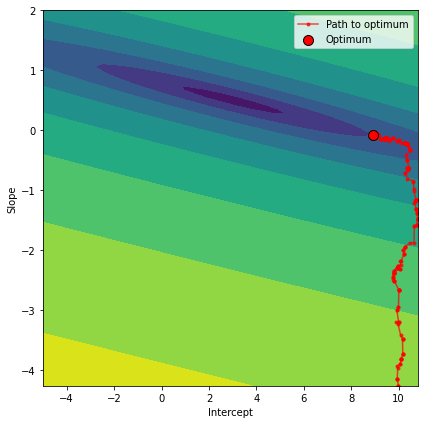

In [19]:
theta = np.random.uniform(-10, 10, size=2)
theta, history = random_changes(theta)
plot_loss_landscape(history)

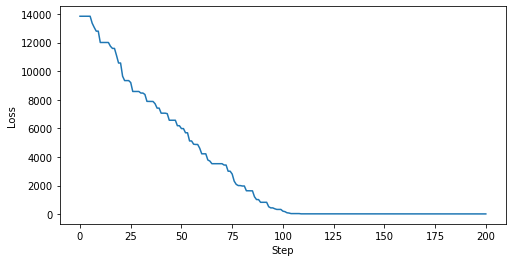

In [12]:
plot_loss(history)

In [20]:
def plot_wrapper(iteration):
  intercept, slope = history[iteration]
  print("Intercept: %.1f, Slope: %.1f" % (intercept, slope))
  interactive_residual_plot(intercept, slope)
interact_plot = ipywidgets.interact(plot_wrapper,
                                    # iteration = ipywidgets.Play(min=0, max=len(history)-1, step=1, value=0));
                                    iteration = ipywidgets.Play(min=0, max=len(history)-1, step=max(1, len(history)//100), value=0));
output = interact_plot.widget.children[-1] # This should prevent flickering
output.layout.height = '500px'
# Note that the play button doesn't always show up in colab. The clickable area is still there though.

interactive(children=(Play(value=0, description='iteration', max=200, step=2), Output()), _dom_classes=('widge…

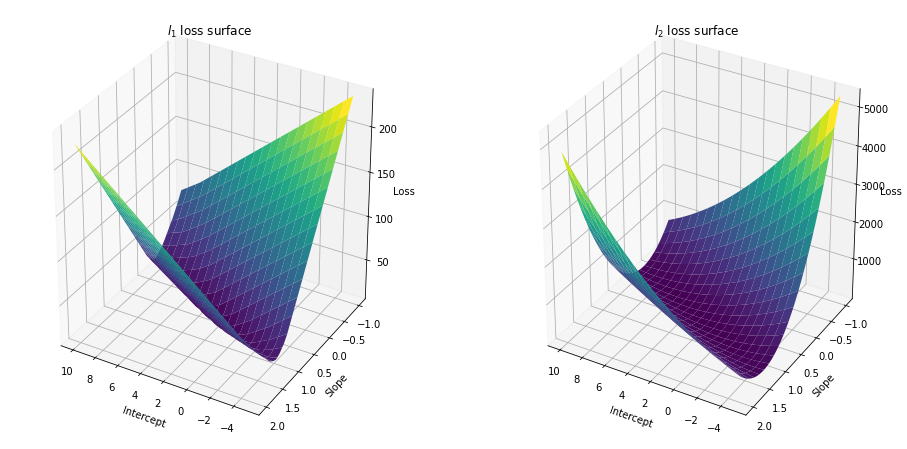

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

xx, yy = np.meshgrid(np.linspace(-5, 10, 100), # Intercept
                    np.linspace(-1, 2, 100)) # Slope

fig = plt.figure(figsize=(16, 8))
for order in [1, 2]:
  ax = fig.add_subplot(1, 2, order, projection='3d')
  Z = np.apply_along_axis(lambda theta: loss(X, y, theta, order=order), 1, 
                          np.concatenate([np.vstack(xx.ravel()), np.vstack(yy.ravel())], axis=1))
  Z = Z.reshape(xx.shape)
  ax.plot_surface(xx, yy, Z, cmap='viridis', rstride=5, cstride=5)
  ax.set_title("$l_%i$ loss surface" % order)
  ax.set_xlabel("Intercept")
  ax.set_ylabel("Slope")
  ax.set_zlabel("Loss")
  ax.view_init(30, 120)
plt.show()

## Probabilistic model

$P(\theta \mid \mathfrak{D}) \propto P(\mathfrak{D} \mid \theta) P(\theta)$

$f(x_{1},\ldots ,x_{n}\mid \mu ,\sigma ^{2})=\prod _{i=1}^{n}f(x_{i}\mid \mu ,\sigma ^{2})=\left({\frac {1}{2\pi \sigma ^{2}}}\right)^{n/2}\exp \left(-{\frac {\sum _{i=1}^{n}(x_{i}-\mu )^{2}}{2\sigma ^{2}}}\right)$

In [15]:
def bayesian_model(x, theta):
  """Bayesian linear model"""
  ret = theta[0] + x*theta[1]
  return ret.ravel()

from scipy.stats import norm

def model_log_likelihood(X, y, theta):
  """"""
  return np.sum(norm(scale=theta[2]).logpdf(y-bayesian_model(X, theta)))

In [16]:
print("Intercept\tSlope\tNoise\t\tLog loss")
for i in range(10):
  theta = np.random.uniform(-10, 10, size=3)
  theta[2] = np.abs(theta[2]) # Theta_2 must not be negative, why?
  print("%.1f\t\t%.1f\t%.1f\t->\t%.1f" % (theta[0], theta[1], theta[2], model_log_likelihood(X, y, theta)))

Intercept	Slope	Noise		Log loss
-3.5		4.1	7.4	->	-115.6
8.7		-2.3	0.0	->	-24834099.1
-6.0		-6.4	9.7	->	-357.7
-3.0		1.9	6.0	->	-39.6
2.5		3.6	8.2	->	-101.7
-6.6		-4.2	8.0	->	-284.8
6.1		-5.9	5.7	->	-607.3
2.1		0.0	5.1	->	-34.1
-6.7		1.0	9.5	->	-36.9
0.7		6.1	3.9	->	-1006.3


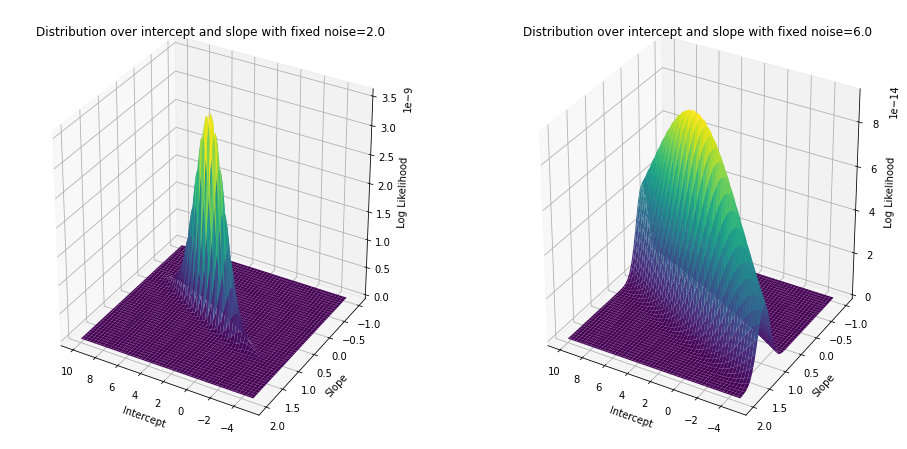

In [17]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

xx, yy = np.meshgrid(np.linspace(-5, 10, 100), # Intercept
                    np.linspace(-1, 2, 100)) # Slope

fig = plt.figure(figsize=(16, 8))
for i, noise_level in enumerate([2, 6]):
  ax = fig.add_subplot(1, 2, i+1, projection='3d')
  thetas_on_grid = np.concatenate([np.vstack(xx.ravel()), np.vstack(yy.ravel())], axis=1)
  thetas_on_grid = np.append(thetas_on_grid, noise_level*np.ones((thetas_on_grid.shape[0], 1)), axis=1)
  Z = np.apply_along_axis(lambda theta: model_log_likelihood(X, y, theta), 1, thetas_on_grid)
  Z = Z.reshape(xx.shape)
  ax.plot_surface(xx, yy, np.exp(Z), cmap='viridis')
  ax.set_title("Distribution over intercept and slope with fixed noise=%.1f" % noise_level)
  ax.set_xlabel("Intercept")
  ax.set_ylabel("Slope")
  ax.set_zlabel("Log Likelihood")
  ax.view_init(30, 120)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


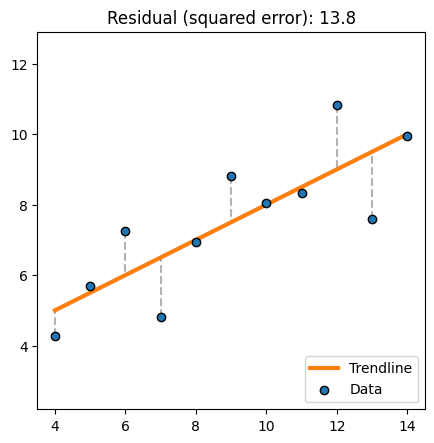

MAP estimate of theta: [3.00001958 0.50009797 1.11854977]


In [18]:
from scipy.optimize import minimize

history = [np.asarray([3, .5, .2])]

def store_theta_during_optimization(current_theta):
  history.append(current_theta)
res = minimize(lambda theta: -model_log_likelihood(X, y, theta), history[0], 
               bounds=[(None, None), (None, None), (1e-3, None)],
               callback=store_theta_during_optimization)
theta = res.x

interactive_residual_plot(theta[0], theta[1])
print("MAP estimate of theta: %s" % theta)